# Task 1: EDA

### Question 1

*Q1: Which country has the most severe overall temperature change from decade to
decade? Please elaborate on how you interpret severe change and decade to
decade.*

My approach:
- Iterate throgh all countries
- Resample the data from monthly to decadely data, get average Temperature of that Decade. Starting year is 1850, as most countries have temperature data by then (see file EDA_supplemental for more information)
- Perform differencing on the resulting dataframe
- For each country, store the maximum difference between an average temperature value for a decade and its predecessor. The highest value is considered the most severe Change.

In [17]:
import pandas as pd
%matplotlib inline

In [2]:
# read data
df_country_temperatures = pd.read_csv("data/archive/GlobalLandTemperaturesByCountry.csv",
                                      index_col="dt",
                                      parse_dates=True)

To obtain the solution, we apply the function `get_max_changes_by_country()` which is defined in the file `eda.py`

In [3]:
from eda import get_max_changes_by_country

In [4]:
severe_changes_df = get_max_changes_by_country(df_country_temperatures)

In [5]:
severe_changes_df.sort_values(by="MaxChanges", ascending=False).head()

,countries,MaxChanges
89,Greenland,1.284550
60,Denmark,1.270117
41,Canada,1.225869
211,Svalbard And Jan Mayen,1.126075
0,Åland,1.072867


Thus, **Greenland** had the most severe Temperature Change.

### Question 2

*Q2: Now write a function which returns N entries of cities which have the highest
variability in AverageTemperature in a specified time range.*

load the new data:

In [6]:
df_city_temps = pd.read_csv("data/archive/GlobalLandTemperaturesByCity.csv", index_col="dt", parse_dates=True)

The function is implemented as `get_n_high_variability_cities` in `eda.py`

As the is not one measure to *variablity*, but four (Range, IQR, Standard Deviation, Variance), I leave it to the user to specify the desired measure.

I mainly used variance as a guide, but also looked at the other metrics. the results were similar. I defined the following period:

In [7]:
from_date = "2012-03"
to_date = "2013-12"

In [8]:
from eda import get_n_high_variability_cities

In [9]:
highest_var_list, df_highest_var = get_n_high_variability_cities(input_df=df_city_temps, 
                                                                 n=4,
                                                                 time_from=from_date,
                                                                 time_to=to_date,
                                                                 return_df=True,
                                                                 measure="var")

The Top 4 Results are:

In [11]:
highest_var_list

['Hailar, China', 'Yakeshi, China', 'Blagoveshchensk, Russia', 'Heihe, Russia']

lets look at the values a bit more in depth:

In [14]:
df_highest_var.sort_values("variability (var)", ascending=False).head(10)

,cities,variability (var)
1125,"Hailar, China",300.324330
3385,"Yakeshi, China",300.324330
1168,"Heihe, Russia",282.991687
400,"Blagoveshchensk, Russia",282.991687
2112,"Nehe, China",282.542423
3215,"Ust Ilimsk, Russia",278.426220
2165,"Norilsk, Russia",275.612823
310,"Beian, China",270.505046
1126,"Hailun, China",270.505046
2928,"Suihua, China",270.505046


It is noticeable that Hailar and Yakeshi, and also Blagoveshchensk and Heihe have the same values for the variance. When you look at Google Maps, you notice that the Cities are very close to each other:

![title](img/hailar_yakeshi.png)

The same is true for Heihe and Blagoveshchensk (even more drastic):

![title](img/heihe_blagoveshchensk.png)

So these to very close pairs were treated as one. For this reason, the two pairs of cities were treated as one each. The top four citites with the highest variability are then 
1. Hailar (Variance: 300.324330)
2. Heihe (Variance: 282.991687)
3. Nehe (Variance: 282.542423) 
4. Ust Ilimsk (Variance: 278.426220)

### Question 3

*Q3: Plot the temperature development (and uncertainty) over time (aggregate as you
see fit) of the top 4 entries of your function for a given time period and save the plot
as a .png file.*

To create the plots (in the notebook, *inline*), I implemented the function `plot_city_temp_over_time` in `eda.py`

In [19]:
from eda import plot_city_temp_over_time

<Figure size 432x288 with 0 Axes>

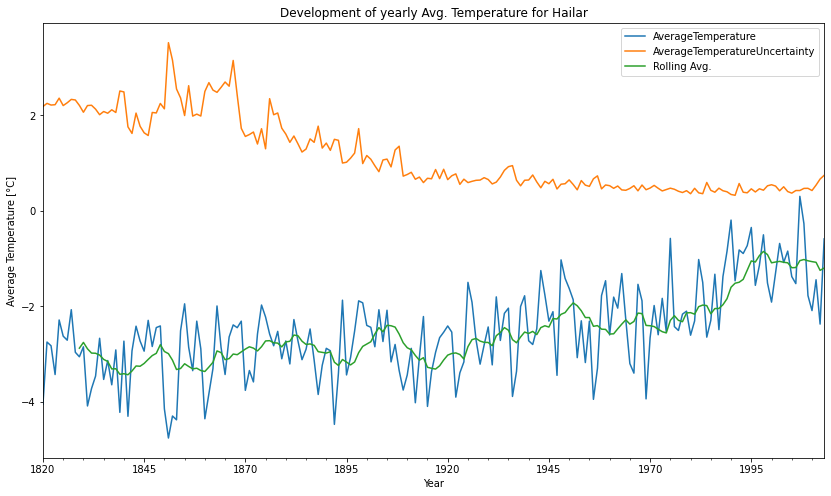

In [20]:
plot_city_temp_over_time(df=df_city_temps,
                        city="Hailar")

Yearly Temperature Increase is clearly visible from around 1994

<Figure size 432x288 with 0 Axes>

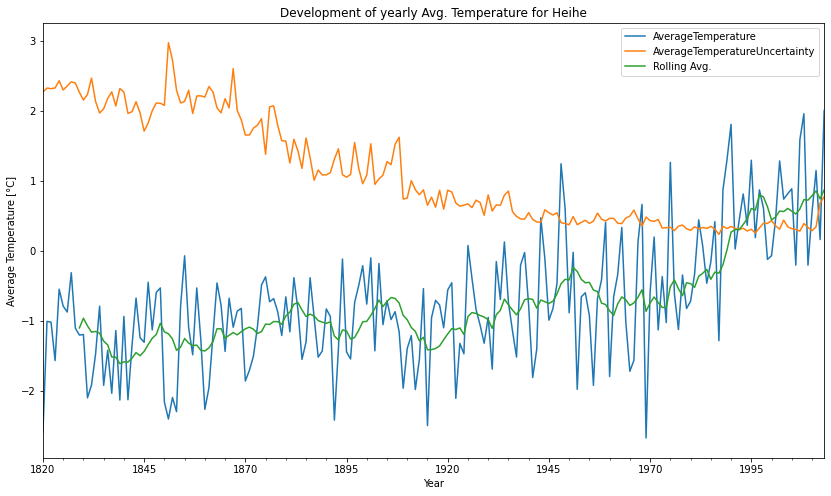

In [21]:
plot_city_temp_over_time(df=df_city_temps,
                        city="Heihe")

The same is true for Heihe, since around 1993

<Figure size 432x288 with 0 Axes>

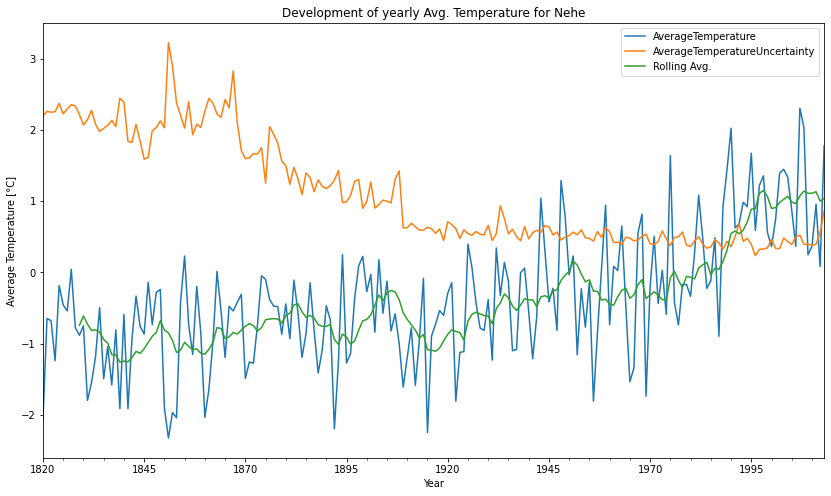

In [22]:
plot_city_temp_over_time(df=df_city_temps,
                        city="Nehe")

Same for Nehe, since around 1993

<Figure size 432x288 with 0 Axes>

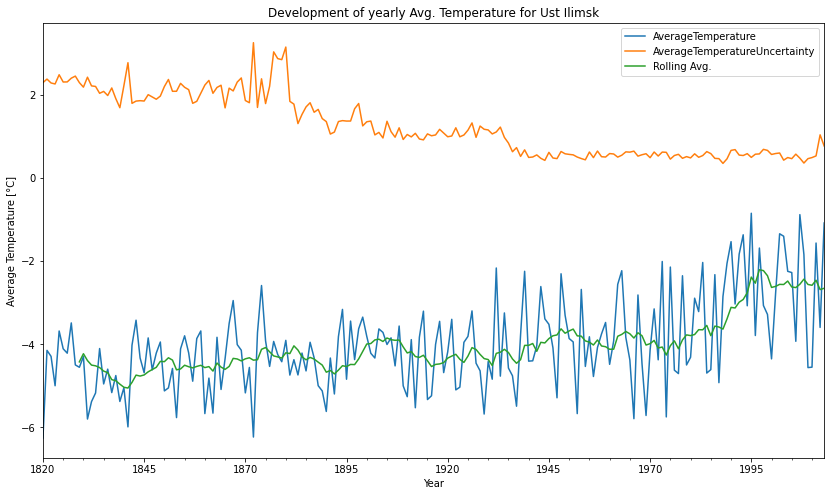

In [23]:
plot_city_temp_over_time(df=df_city_temps,
                        city="Ust Ilimsk")

Finally, also for Ust Ilimsk, since 1994